In [2]:
!pip install pyspark

    100% |████████████████████████████████| 215.7MB 110kB/s 
    100% |████████████████████████████████| 204kB 28.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/47/9b/57/7984bf19763749a13eece44c3174adb6ae4bc95b920375ff50
Successfully built pyspark


In [0]:
#importing library
import pyspark
from pyspark.sql import SQLContext,SparkSession
from pyspark.sql.types import StructType,IntegerType, StructField, FloatType, DecimalType
from pyspark.sql.functions import stddev
from pyspark import SparkContext, SparkConf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import sqrt

from pyspark.sql import Row
import matplotlib.pyplot as plt

In [0]:
sc = SparkSession \
    .builder \
    .appName("Python Spark SQL") \
    .getOrCreate()

In [0]:
from pyspark.mllib.clustering import KMeans

In [0]:
import pyspark.sql.functions as functions
text = sc.sparkContext.textFile("sunspots.txt")
filedf = text.map(lambda x : x.split("\t"))
df = sc.createDataFrame(filedf).toDF("Months","sunspots")
df = df.withColumn("Months",df["Months"].cast(IntegerType()))
df = df.withColumn("sunspots",df["sunspots"].cast(FloatType()))



In [0]:
import pyspark.sql.functions as functions
from pyspark.sql import Window
w = Window.orderBy("Months")


In [9]:
from pyspark.sql.window import Window
df = df.withColumn("new_col",functions.lit(1))
windowspec = Window.partitionBy(df["new_col"]).orderBy(df["Months"]).rowsBetween(-1,1)
moving_avg = functions.avg("sunspots").over(windowspec)
df = df.withColumn("moving_avg",moving_avg)
df.show()

+------+--------+-------+------------------+
|Months|sunspots|new_col|        moving_avg|
+------+--------+-------+------------------+
|     0|    58.0|      1| 60.29999923706055|
|     1|    62.6|      1| 63.53333282470703|
|     2|    70.0|      1|62.766666412353516|
|     3|    55.7|      1| 70.23333358764648|
|     4|    85.0|      1| 74.73333358764648|
|     5|    83.5|      1| 87.76666768391927|
|     6|    94.8|      1| 81.53333536783855|
|     7|    66.3|      1| 79.00000254313152|
|     8|    75.9|      1| 72.56666819254558|
|     9|    75.5|      1|103.33333587646484|
|    10|   158.6|      1|106.43333435058594|
|    11|    85.2|      1| 105.7000020345052|
|    12|    73.3|      1| 78.13333384195964|
|    13|    75.9|      1| 79.46666717529297|
|    14|    89.2|      1| 84.46666717529297|
|    15|    88.3|      1| 89.16666666666667|
|    16|    90.0|      1| 92.76666768391927|
|    17|   100.0|      1|  91.8000005086263|
|    18|    85.4|      1| 96.13333384195964|
|    19|  

In [10]:
df = df.withColumn("residual", (df.sunspots-df.moving_avg)*(df.sunspots-df.moving_avg))
std = df.select(functions.sqrt(functions.sum(df.residual)/df.count()).alias("std"))
df =df.crossJoin(std)
df.show()


+------+--------+-------+------------------+------------------+----------------+
|Months|sunspots|new_col|        moving_avg|          residual|             std|
+------+--------+-------+------------------+------------------+----------------+
|     0|    58.0|      1| 60.29999923706055| 5.289996490479098|9.30494744459294|
|     1|    62.6|      1| 63.53333282470703|0.8711130099836737|9.30494744459294|
|     2|    70.0|      1|62.766666412353516| 52.32111479017476|9.30494744459294|
|     3|    55.7|      1| 70.23333358764648|211.21776299370686|9.30494744459294|
|     4|    85.0|      1| 74.73333358764648|105.40443922254781|9.30494744459294|
|     5|    83.5|      1| 87.76666768391927|18.204453125000995|9.30494744459294|
|     6|    94.8|      1| 81.53333536783855|176.00447143554777|9.30494744459294|
|     7|    66.3|      1| 79.00000254313152| 161.2899870808923|9.30494744459294|
|     8|    75.9|      1| 72.56666819254558|11.111111111111079|9.30494744459294|
|     9|    75.5|      1|103

In [0]:
final_df = df["sunspots","moving_avg","std"]


In [12]:
final =final_df.rdd.map(list)
type(final)

pyspark.rdd.PipelinedRDD

In [0]:
final.take(5)

In [0]:
from pyspark.ml.clustering import KMeans

In [14]:
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=["sunspots", "moving_avg","std"], outputCol="features")
new_df = vecAssembler.transform(final_df)
new_df.show()

+--------+------------------+----------------+--------------------+
|sunspots|        moving_avg|             std|            features|
+--------+------------------+----------------+--------------------+
|    58.0| 60.29999923706055|9.30494744459294|[58.0,60.29999923...|
|    62.6| 63.53333282470703|9.30494744459294|[62.5999984741210...|
|    70.0|62.766666412353516|9.30494744459294|[70.0,62.76666641...|
|    55.7| 70.23333358764648|9.30494744459294|[55.7000007629394...|
|    85.0| 74.73333358764648|9.30494744459294|[85.0,74.73333358...|
|    83.5| 87.76666768391927|9.30494744459294|[83.5,87.76666768...|
|    94.8| 81.53333536783855|9.30494744459294|[94.8000030517578...|
|    66.3| 79.00000254313152|9.30494744459294|[66.3000030517578...|
|    75.9| 72.56666819254558|9.30494744459294|[75.9000015258789...|
|    75.5|103.33333587646484|9.30494744459294|[75.5,103.3333358...|
|   158.6|106.43333435058594|9.30494744459294|[158.600006103515...|
|    85.2| 105.7000020345052|9.30494744459294|[8

In [0]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=5, seed=1)  # 2 clusters here
model = kmeans.fit(new_df.select('features'))

In [16]:
transformed = model.transform(new_df)
transformed.show() 

+--------+------------------+----------------+--------------------+----------+
|sunspots|        moving_avg|             std|            features|prediction|
+--------+------------------+----------------+--------------------+----------+
|    58.0| 60.29999923706055|9.30494744459294|[58.0,60.29999923...|         0|
|    62.6| 63.53333282470703|9.30494744459294|[62.5999984741210...|         0|
|    70.0|62.766666412353516|9.30494744459294|[70.0,62.76666641...|         0|
|    55.7| 70.23333358764648|9.30494744459294|[55.7000007629394...|         0|
|    85.0| 74.73333358764648|9.30494744459294|[85.0,74.73333358...|         0|
|    83.5| 87.76666768391927|9.30494744459294|[83.5,87.76666768...|         0|
|    94.8| 81.53333536783855|9.30494744459294|[94.8000030517578...|         0|
|    66.3| 79.00000254313152|9.30494744459294|[66.3000030517578...|         0|
|    75.9| 72.56666819254558|9.30494744459294|[75.9000015258789...|         0|
|    75.5|103.33333587646484|9.30494744459294|[75.5,

In [27]:
final_transformed = transformed
final_transformed.show()

+--------+------------------+----------------+--------------------+----------+
|sunspots|        moving_avg|             std|            features|prediction|
+--------+------------------+----------------+--------------------+----------+
|    58.0| 60.29999923706055|9.30494744459294|[58.0,60.29999923...|         0|
|    62.6| 63.53333282470703|9.30494744459294|[62.5999984741210...|         0|
|    70.0|62.766666412353516|9.30494744459294|[70.0,62.76666641...|         0|
|    55.7| 70.23333358764648|9.30494744459294|[55.7000007629394...|         0|
|    85.0| 74.73333358764648|9.30494744459294|[85.0,74.73333358...|         0|
|    83.5| 87.76666768391927|9.30494744459294|[83.5,87.76666768...|         0|
|    94.8| 81.53333536783855|9.30494744459294|[94.8000030517578...|         0|
|    66.3| 79.00000254313152|9.30494744459294|[66.3000030517578...|         0|
|    75.9| 72.56666819254558|9.30494744459294|[75.9000015258789...|         0|
|    75.5|103.33333587646484|9.30494744459294|[75.5,

In [0]:
from pyspark.sql import functions as F
sigma = 3
final_transformed = final_transformed\
.withColumn('prediction_New',F.when((final_transformed.sunspots>final_transformed.moving_avg + sigma * final_transformed.std) | (final_transformed.sunspots<final_transformed.moving_avg-sigma *final_transformed.std),6).otherwise(final_transformed.prediction))\


In [29]:
pddf_pred = final_transformed.toPandas()
pddf_pred.head()

,sunspots,moving_avg,std,features,prediction,prediction_New
0,58.000000,60.299999,9.304947,"[58.0, 60.29999923706055, 9.30494744459294]",0,0
1,62.599998,63.533333,9.304947,"[62.599998474121094, 63.53333282470703, 9.3049...",0,0
2,70.000000,62.766666,9.304947,"[70.0, 62.766666412353516, 9.30494744459294]",0,0
3,55.700001,70.233334,9.304947,"[55.70000076293945, 70.23333358764648, 9.30494...",0,0
4,85.000000,74.733334,9.304947,"[85.0, 74.73333358764648, 9.30494744459294]",0,0


In [0]:
 sunspot = pddf_pred["sunspots"].tolist()

In [0]:
moving_average = pddf_pred["moving_avg"].tolist()
std_deviation =  pddf_pred["std"].tolist()

In [0]:
prediction =  pddf_pred["prediction_New"].tolist()

In [0]:
anamoly_sunspots = []
anamoly_moving_avg = []
anamoly_std = []
prediction_anamoly = []
for i in range(1,5):
    df1= transformed[transformed["prediction"] == i]
    sigma = 3
    anamoly_df1 = df1.filter((df1.sunspots>df1.moving_avg + sigma * df1.std) | (df1.sunspots<df1.moving_avg-sigma *df1.std) )
    anamoly_sunspots.extend([int(row.sunspots) for row in anamoly_df1.collect()])
    anamoly_moving_avg.extend([int(row.moving_avg) for row in anamoly_df1.collect()])
    anamoly_std.extend([int(row.std) for row in anamoly_df1.collect()])
    prediction_anamoly.extend([int(row.prediction) for row in anamoly_df1.collect()])

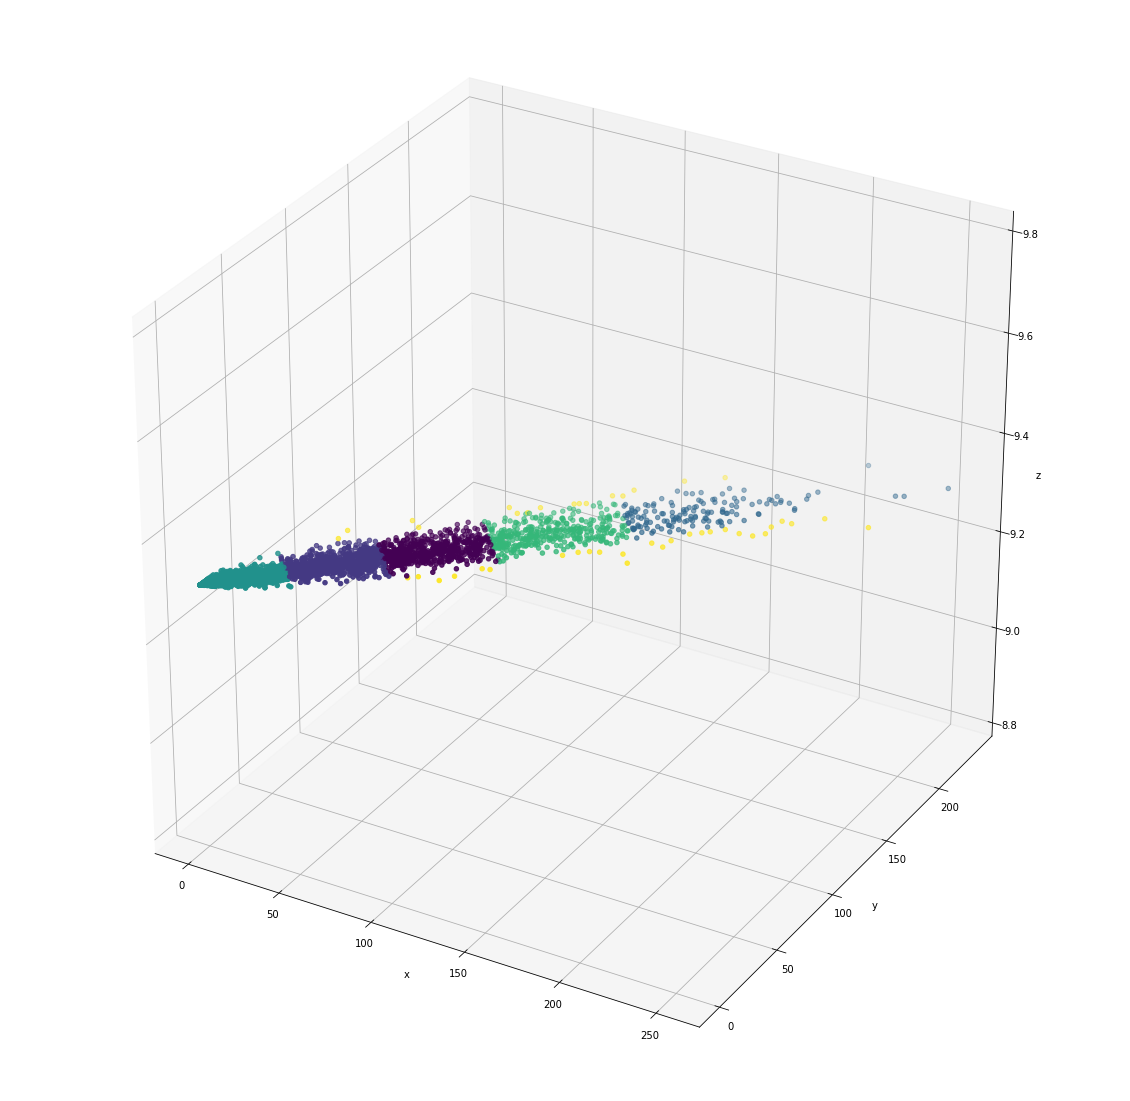

In [35]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure(figsize=(20,20)).gca(projection='3d')
threedee.scatter(sunspot,moving_average,std_deviation,c=prediction)
threedee.set_xlabel('x')
threedee.set_ylabel('y')
threedee.set_zlabel('z')
plt.show()